# Introduction:
In this project, we attempt to find the Pittsburgh neighborhood that would be **the best** place to commit crimes. To do this, we take a look at several metrics such as number of arrests, population, and number of trees. Each metric aids one's ability to commit crimes safely and effectively. 

![alt-text](https://media.giphy.com/media/NFzNOIBiFYlZS/giphy.gif)


# The Metrics:
## Explanations:
Arrests by neighborhood is used to find the neighborhoods that have the highest and lowest number of arrests. Population can be analyzed to find out if there are going to be enough people to commit crimes against, if there will be too many witnesses, and can be used to find the ratio of arrests per capita. Trees by neighborhood allows us to pick a neighborhood with the most suitable hideout locations in case we are being chased by police, we can hide amongst the trees.
## Datasets:
* Dataset "Arrests by Neighborhood" - https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f
* Dataset "Population by Neighborhood" - https://data.wprdc.org/dataset/pgh/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745
* Dataset "Trees by Neighborhood" - https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da



# Arrests by neighborhood
We will analyze arrest data by neighborhood, and figure out the best neighborhood to avoid being arrested in.

![alt-text](https://media.giphy.com/media/l2JejeOd6tGGOw3p6/giphy.gif)

### Importing Pandas, Matplotlib, and Geopandas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

### Establishing the Dataset for Arrests per Neighborhood:

In [2]:
arrestsData = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

### Checking for Usable Values:
Found the neighborhood identifier called: **"INCIDENTLOCATION"**

In [3]:
arrestsData.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


### Made sure that there data for neighborhoods is usable:

In [4]:
print(len(arrestsData['INCIDENTNEIGHBORHOOD'].unique()))
arrestsData['INCIDENTNEIGHBORHOOD'].unique()

99


array(['Bloomfield', 'Outside City', 'Westwood', 'East Allegheny',
       'Crafton Heights', 'Greenfield', 'Brookline', 'Regent Square',
       'East Liberty', nan, 'East Hills', 'Carrick', 'Allegheny Center',
       'South Side Flats', 'Sheraden', 'East Carnegie',
       'Golden Triangle/Civic Arena', 'Point Breeze North', 'Perry South',
       'Allentown', 'North Shore', 'Marshall-Shadeland',
       'Central Oakland', 'Middle Hill', 'Strip District',
       'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Perry North', 'Bedford Dwellings', 'Elliott', 'Beechview',
       'Fineview', 'Glen Hazel', 'Spring Hill-City View', 'Bluff',
       'Manchester', 'Homewood West', 'Outside County', 'Point Breeze',
       'Homewood South', 'Squirrel Hill South', 'Terrace Village',
       'Upper Lawrenceville', 'Arlington', 'South Side Slopes',
       'Lower Lawrenc

### Creating a new Dataset:
I used panda's **"groupby"** function to create a new dataset that matches each neighborhood to it's total times referenced in the orginal dataset.

Then, I **sorted** the new dataset by the associated values to find the highest amount of incidents and the lowest amount of incidents.

In [5]:
incidents_per_neighborhood = arrestsData.groupby('INCIDENTNEIGHBORHOOD')['AGE'].count()
incidents_per_neighborhood.sort_values(ascending = False)

INCIDENTNEIGHBORHOOD
Central Business District    3532
South Side Flats             3012
Carrick                      2082
East Allegheny               1889
Homewood South               1856
                             ... 
Regent Square                  32
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: AGE, Length: 98, dtype: int64

### Using Geopandas:
Next, I loaded in the neighborhoods map object.

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

### Merging data into the map:
I combined the data from the map and from the dataset to create a map which associates the number of incidents with the neighborhood.

In [7]:
steps_map = neighborhoods.merge(incidents_per_neighborhood, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
steps_map[['hood','AGE','geometry']].head()

,hood,AGE,geometry
0,Central Oakland,466.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,386.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,273.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,726.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,439.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


### Creating the Map:
Here, I used the mapping feature of geopandas to create a **choropleth map** which is darker in higher arrests areas.

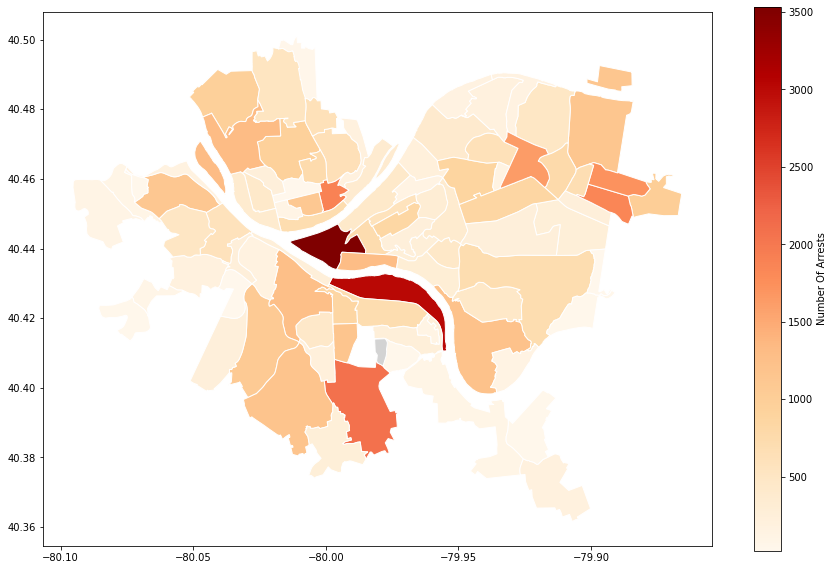

In [8]:
steps_map.plot(column='AGE', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number Of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

# Explanation:
The above map represents the number of arrests by neighborhood.
The results of the calculations show that:
* You are **most** likely to be arrested in: "Central Business District"
* You are **least** likely to be arrested in: "Mt. Oliver Neighborhood"

# Population
We will be finding which neighborhood has the highest population and using population to find which neighborhood has the highest arrests per capita.

![alt-text](https://media.giphy.com/media/64HmY2ldxMtTa/giphy.gif)

## Importing the dataset

In [9]:
df_total = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745/download/housing.csv")

## Separating the data into population

We can find each neighborhood in the 'Neighborhood' column of the original data frame. We can then also find the values for population.

In [10]:
df_pop = df_total[['Neighborhood', 'Population (2010)']].copy()
df_pop.head(30)

,Neighborhood,Population (2010)
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,"2,500"
3,Arlington,"1,869"
4,Arlington Heights,244
5,Banksville,"4,144"
6,Bedford Dwellings,"1,202"
7,Beechview,"7,974"
8,Beltzhoover,"1,925"
9,Bloomfield,"8,442"


### Finding how things are indexed within this data
To inform us on how we will access the neighborhood arrest data later, we test out here how to find a neighborhood's arrest value. We find that we can index via the neighborhood name.

In [11]:
print(incidents_per_neighborhood)
x = incidents_per_neighborhood['Chateau']
print(x)

INCIDENTNEIGHBORHOOD
Allegheny Center       1117
Allegheny West          114
Allentown               849
Arlington               262
Arlington Heights       130
                       ... 
Upper Lawrenceville     169
West End                250
West Oakland            273
Westwood                201
Windgap                 103
Name: AGE, Length: 98, dtype: int64
392


## Finding arrests/person for each neighborhood
Using the separated data from the incidents_per_neighborhood dataframe, we can find the amount of arrests and compare that to the total population.

For the purposes of future analysis (for when we combine every metric and do our overall analysis), we will subtract all of these values from 5.

### Finding neighborhood inconsistencies
First, we need to find if there are any inconsistencies in the neighborhoods across each dataset. This later lets us prune neighborhoods that aren't neighborhoods, and include any name variations.

In [12]:
nh1 = []
nh2 = incidents_per_neighborhood.index.values
for i in range(len(df_pop)):
    nh_name = df_pop['Neighborhood'][i]
    nh1.append(nh_name)
    
print(list(set(nh1).symmetric_difference(set(nh2))))

['Central North Side', 'Golden Triangle/Civic Arena', 'Outside County', 'Mt. Oliver Neighborhood', 'Mt. Oliver', 'Mount Oliver', 'Mt. Oliver Boro', 'Troy Hill-Herrs Island', 'Outside City', 'Outside State']


### Compiling data per neighborhood into a dictionary
Now that we know what neighborhood inconsistencies we have to deal with, we can begin to compile all of the data into a dictionary, with neighborhood as the key and a list of their pop/arrests as the value.

In [13]:
nh1 = []
nh2 = incidents_per_neighborhood.index.values

vals_both = {}
for i in range(len(df_pop)):
    nh_name = df_pop['Neighborhood'][i]
    nh1.append(nh_name)
    pop_val = int(df_pop['Population (2010)'][i].replace(',',''))
    if nh_name == 'Central Northside':
        arrest_val = incidents_per_neighborhood['Central North Side']
    elif nh_name == 'Mt. Oliver':
        arrestval = incidents_per_neighborhood['Mt. Oliver Boro']
        arrestval += incidents_per_neighborhood['Mount Oliver']
        arrestval += incidents_per_neighborhood['Mt. Oliver Neighborhood']
    elif nh_name == 'Troy Hill':
        arrestval = incidents_per_neighborhood['Troy Hill-Herrs Island']
    elif nh_name in ['Outside County', 'Outside City', 'Outside State', 'Golden Triangle/Civic Arena']:
        pass
    else:
        arrest_val = incidents_per_neighborhood[nh_name]
    vals_both[nh_name] = [pop_val,arrest_val]
print(vals_both)

{'Allegheny Center': [933, 1117], 'Allegheny West': [462, 114], 'Allentown': [2500, 849], 'Arlington': [1869, 262], 'Arlington Heights': [244, 130], 'Banksville': [4144, 255], 'Bedford Dwellings': [1202, 580], 'Beechview': [7974, 1068], 'Beltzhoover': [1925, 457], 'Bloomfield': [8442, 875], 'Bluff': [6600, 1305], 'Bon Air': [808, 229], 'Brighton Heights': [7247, 975], 'Brookline': [13214, 1187], 'California-Kirkbride': [761, 255], 'Carrick': [10113, 2082], 'Central Business District': [3629, 3532], 'Central Lawrenceville': [4482, 397], 'Central Northside': [2923, 756], 'Central Oakland': [6086, 466], 'Chartiers City': [477, 38], 'Chateau': [11, 392], 'Crafton Heights': [3814, 510], 'Crawford-Roberts': [2256, 726], 'Duquesne Heights': [2425, 177], 'East Allegheny': [2136, 1889], 'East Carnegie': [570, 46], 'East Hills': [3169, 1022], 'East Liberty': [5869, 1633], 'Elliott': [2381, 586], 'Esplen': [301, 186], 'Fairywood': [1002, 108], 'Fineview': [1285, 749], 'Friendship': [1785, 150], '

## Organizing population
Next, we will isolate the population for each neighborhood and find how it is sorted from least to greatest. It is important that it is sorted from least to greatest because we want to find the neighborhood with the lowest population (less witnesses).

In [14]:
print(vals_both)
nb_pop = {}
for i in vals_both:
    nb_pop[i] = vals_both[i][0]
print(nb_pop)

popData = pd.DataFrame([nb_pop])
popDF = popData.transpose()
popDF = popDF.rename(columns={0: 'Population'})

sortedPop = popDF.sort_values('Population', ascending=True)
sortedPop

{'Allegheny Center': [933, 1117], 'Allegheny West': [462, 114], 'Allentown': [2500, 849], 'Arlington': [1869, 262], 'Arlington Heights': [244, 130], 'Banksville': [4144, 255], 'Bedford Dwellings': [1202, 580], 'Beechview': [7974, 1068], 'Beltzhoover': [1925, 457], 'Bloomfield': [8442, 875], 'Bluff': [6600, 1305], 'Bon Air': [808, 229], 'Brighton Heights': [7247, 975], 'Brookline': [13214, 1187], 'California-Kirkbride': [761, 255], 'Carrick': [10113, 2082], 'Central Business District': [3629, 3532], 'Central Lawrenceville': [4482, 397], 'Central Northside': [2923, 756], 'Central Oakland': [6086, 466], 'Chartiers City': [477, 38], 'Chateau': [11, 392], 'Crafton Heights': [3814, 510], 'Crawford-Roberts': [2256, 726], 'Duquesne Heights': [2425, 177], 'East Allegheny': [2136, 1889], 'East Carnegie': [570, 46], 'East Hills': [3169, 1022], 'East Liberty': [5869, 1633], 'Elliott': [2381, 586], 'Esplen': [301, 186], 'Fairywood': [1002, 108], 'Fineview': [1285, 749], 'Friendship': [1785, 150], '

,Population
Chateau,11
South Shore,19
St. Clair,209
Arlington Heights,244
West End,254
...,...
North Oakland,10551
Squirrel Hill North,11363
Brookline,13214
Shadyside,13915


## Computing the arrests/pop ratio
Next, we replace the list value for each neighborhood with the value of their arrests/pop ratio. Although the way this is done is fairly crude, it still works!

In [15]:
vals_ratio = {}
for i in vals_both:
    vals_ratio[i] = vals_both[i][1]/vals_both[i][0]
print(vals_ratio)

{'Allegheny Center': 1.197213290460879, 'Allegheny West': 0.24675324675324675, 'Allentown': 0.3396, 'Arlington': 0.14018191546281433, 'Arlington Heights': 0.5327868852459017, 'Banksville': 0.06153474903474904, 'Bedford Dwellings': 0.4825291181364393, 'Beechview': 0.13393528969149737, 'Beltzhoover': 0.2374025974025974, 'Bloomfield': 0.10364842454394693, 'Bluff': 0.19772727272727272, 'Bon Air': 0.2834158415841584, 'Brighton Heights': 0.13453842969504623, 'Brookline': 0.08982896927501136, 'California-Kirkbride': 0.33508541392904073, 'Carrick': 0.20587362800355977, 'Central Business District': 0.9732708735188758, 'Central Lawrenceville': 0.08857652833556448, 'Central Northside': 0.2586383852206637, 'Central Oakland': 0.07656917515609596, 'Chartiers City': 0.07966457023060797, 'Chateau': 35.63636363636363, 'Crafton Heights': 0.13371788148925012, 'Crawford-Roberts': 0.32180851063829785, 'Duquesne Heights': 0.07298969072164949, 'East Allegheny': 0.8843632958801498, 'East Carnegie': 0.08070175

### Insights
We can see some *very* interesting things here. The major thing that pops out is the neighborhood Chateau with a ratio of ~35.6arrests/person. That is crazy, and the math checks out! In 2010, Chateau had a population of 11 according to the dataset, while it had 392 arrests in that area. Maybe people consistently fled to that area -- who knows. All we know is that police are very active there -- if we want to commit crime and *not* get caught, Chateau is not the place to be.

### Final computation for ratio
The final computation we do is creating a new dictionary that contains all neighborhoods and (their ratio times 10) subtracted from 100. This helps us greatly with our final analysis, so it's easier to do now rather than later.

We want to find the place with the lowest ratio, and since our analysis relies on computing some geometry, it helps us to have that low ratio value be associated with a high number. Multiplying by 10 helps us see differences between neighborhoods much easier, since a lot of these ratios are very small decimals.

In [16]:
vals_ratio_adj = {}
for i in vals_ratio:
    vals_ratio_adj[i] = 100-(vals_ratio[i])
print(vals_ratio_adj)

{'Allegheny Center': 98.80278670953912, 'Allegheny West': 99.75324675324676, 'Allentown': 99.6604, 'Arlington': 99.85981808453718, 'Arlington Heights': 99.4672131147541, 'Banksville': 99.93846525096525, 'Bedford Dwellings': 99.51747088186356, 'Beechview': 99.8660647103085, 'Beltzhoover': 99.76259740259741, 'Bloomfield': 99.89635157545605, 'Bluff': 99.80227272727272, 'Bon Air': 99.71658415841584, 'Brighton Heights': 99.86546157030496, 'Brookline': 99.91017103072498, 'California-Kirkbride': 99.66491458607096, 'Carrick': 99.79412637199644, 'Central Business District': 99.02672912648113, 'Central Lawrenceville': 99.91142347166443, 'Central Northside': 99.74136161477934, 'Central Oakland': 99.9234308248439, 'Chartiers City': 99.9203354297694, 'Chateau': 64.36363636363637, 'Crafton Heights': 99.86628211851075, 'Crawford-Roberts': 99.67819148936171, 'Duquesne Heights': 99.92701030927834, 'East Allegheny': 99.11563670411985, 'East Carnegie': 99.91929824561403, 'East Hills': 99.67750078889239, 

In [17]:
ratioData = pd.DataFrame([vals_ratio_adj])
ratioDF = ratioData.transpose()
ratioDF = ratioDF.rename(columns={0: 'Arrests per capita adjusted value'})

sortedRatio = ratioDF.sort_values('Arrests per capita adjusted value', ascending=False)
sortedRatio

,Arrests per capita adjusted value
Squirrel Hill North,99.977911
Swisshelm Park,99.972079
Regent Square,99.965517
North Oakland,99.963416
New Homestead,99.961616
...,...
Allegheny Center,98.802787
North Shore,97.633663
Mt. Oliver,97.489194
South Shore,86.000000


## Visualizing
We just plot all of this data across a number line to find the best neighborhood within this metric.


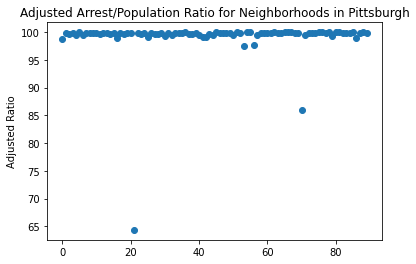

In [18]:
ratios_adj = vals_ratio_adj.values()
nums = list(range(len(ratios_adj)))
plt.scatter(nums, ratios_adj)
plt.ylabel("Adjusted Ratio")  
plt.title("Adjusted Arrest/Population Ratio for Neighborhoods in Pittsburgh")
plt.show()

This visualization is just meant to show that there is a clear outlier for worst neighborhood and a best neighborhood in accordance to this metric. We can later find that those are:

In [19]:
max_value = max(vals_ratio_adj, key=vals_ratio_adj.get)
print(max_value)

min_value = min(vals_ratio_adj, key=vals_ratio_adj.get)
print(min_value)

Squirrel Hill North
Chateau


We can then find that the
- **Best** neighborhood is Squirrel Hill North, with an adjusted ratio of 99.978
- **Worst** neighborhood is Chateau (as expected), with an adjusted ratio of 64.364

# Trees
We will analyze the number and size of trees per neighborhood to find the best neighborhood to hide from witnesses using the cover of trees when committing crimes.

![alt-text](https://media.giphy.com/media/SgvQmElxQgMqmdXSY2/giphy.gif)

# Establishing Amount of Trees to Analyze:

We want to read the dataset for the amount of trees. Using this, we find there are 45,709 trees to analyze. This is a lot for jupyterhub to process. We set low_memory to false so that instead of reading the dataset by row like usual, Jupyterhub will read it by column.

In [20]:
# import dataset
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", low_memory=False) 
trees

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45704,39047675,499 N LANG AVE,N LANG AVE,Maple: Norway,Acer platanoides,15.0,15.0,NaN,NaN,NaN,...,Point Breeze North,9.0,14.0,4.200314e+10,2.0,14.0,4.0,3-14,40.453499,-79.901280
45705,1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139
45706,1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095
45707,1830872418,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.442946,-79.934062


# Lower Amount of Trees to Analyze

We locate the amount of trees that have a width of at least 20 inches so that we can use them to hide behind without being caught.

(Average human shoulder width is 14.4 inches long to 16.1 long according to https://www.healthline.com/health/average-shoulder-width, we'll use 20 inches for many people with shoudler width's above 16.1 inches.)

In [21]:
big_trees = trees.loc[trees['width']> 19]

big_trees

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
10,998993932,3233,THAYER ST,Honeylocust: Thornless,Gleditsia triacanthos inermis,48.0,20.0,99.0,99.0,Open or Restricted,...,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453213,-80.067245
11,1870646392,1427,ISOLINE ST,Oak: Northern Red,Quercus rubra,65.0,20.0,99.0,99.0,Open or Unrestricted,...,Chartiers City,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.455997,-80.070408
17,1785336569,3165,ASHLYN ST,Linden: Littleleaf,Tilia cordata,36.0,30.0,12.0,3.0,Well or Pit,...,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.457545,-80.057536
30,898122731,3234,MOTOR ST,Locust: Black,Robinia pseudoacacia,60.0,35.0,99.0,99.0,Open or Unrestricted,...,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.459050,-80.056144
31,1582917146,3234,MOTOR ST,Cherry: Black,Prunus serotina,60.0,35.0,99.0,99.0,Open or Unrestricted,...,Sheraden,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.458991,-80.056229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45261,1946247732,1129,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,25.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476230,-79.924299
45318,1386613706,3971,BRIGHTON RD,Oak: Northern Red,Quercus rubra,65.0,40.0,NaN,NaN,NaN,...,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.487504,-80.040586
45319,700063579,3971,NaN,Oak: Northern Red,Quercus rubra,60.0,25.0,NaN,NaN,NaN,...,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.487471,-80.040499
45322,49984623,18 sprain st,NaN,Mulberry: Red,Morus rubra,40.0,30.0,NaN,NaN,NaN,...,Fineview,1.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.463636,-80.001481


# Connect Trees to Neighborhoods:
Now that we only have 2273 trees to analyze, we can connect each hidable tree to their respective neighborhood.

In [22]:
hidable_trees = big_trees['neighborhood']

hidable_trees

10               Sheraden
11         Chartiers City
17               Sheraden
30               Sheraden
31               Sheraden
               ...       
45261       Highland Park
45318    Brighton Heights
45319    Brighton Heights
45322            Fineview
45339            Fineview
Name: neighborhood, Length: 2273, dtype: object

# Create a Dictionary:
Create a dictionary to count how many hidable trees there are in each neighborhood. If a neighborhood in the hidable_trees dataset, add in to the tree counter. Every time a neighborhood appears, add 1 tree to the value.

In [23]:
tree_counter = dict()

for neighborhood in hidable_trees[1:]:
    
    if neighborhood not in tree_counter:
        tree_counter[neighborhood] = 1
    else:
        tree_counter[neighborhood] += 1
        
tree_counter

{'Chartiers City': 2,
 'Sheraden': 26,
 'Stanton Heights': 46,
 'Highland Park': 77,
 'Polish Hill': 14,
 'Friendship': 34,
 'Garfield': 39,
 'East Liberty': 30,
 'Homewood South': 4,
 'Homewood North': 13,
 'East Hills': 47,
 'Squirrel Hill South': 220,
 'Marshall-Shadeland': 44,
 'Brighton Heights': 54,
 'Overbrook': 15,
 'South Side Slopes': 4,
 'Arlington': 3,
 'Carrick': 57,
 'Shadyside': 83,
 'North Shore': 3,
 'Greenfield': 20,
 'Point Breeze North': 16,
 'Point Breeze': 101,
 'Knoxville': 35,
 'Mount Washington': 40,
 'New Homestead': 12,
 'South Oakland': 3,
 'Beechview': 45,
 'Squirrel Hill North': 367,
 'Allegheny West': 13,
 'Hazelwood': 21,
 'Perry South': 53,
 'Central Northside': 7,
 'Middle Hill': 10,
 'Upper Hill': 21,
 'North Oakland': 49,
 'Bloomfield': 41,
 'Bon Air': 3,
 'Fineview': 21,
 'Lincoln-Lemington-Belmar': 48,
 'Regent Square': 21,
 'Central Oakland': 10,
 'Lower Lawrenceville': 62,
 'Westwood': 25,
 'Crafton Heights': 39,
 'Brookline': 56,
 'Lincoln Place

# Turn Dictionary into Dataset
Turn the tree_counter dictionary into a dataset.

In [24]:
treesData = pd.DataFrame([tree_counter])
treesData

,Chartiers City,Sheraden,Stanton Heights,Highland Park,Polish Hill,Friendship,Garfield,East Liberty,Homewood South,Homewood North,...,Arlington Heights,St. Clair,Duquesne Heights,Allentown,Morningside,Allegheny Center,Manchester,Ridgemont,Beltzhoover,South Side Flats
0,2,26,46,77,14,34,39,30,4,13,...,1,2,2,1,11,1,1,1,1,1


# Finalize the Data:
Use transpose() to turn the columns of a dataset into rows and vice versa. Rename the columns and sort the values. 

In [25]:
treesDF = treesData.transpose()
treesDF = treesDF.rename(columns={0: 'Hidable Trees'})

sortedTrees = treesDF.sort_values('Hidable Trees', ascending=False)
sortedTrees

,Hidable Trees
Squirrel Hill North,367
Squirrel Hill South,220
Point Breeze,101
Central Business District,89
Shadyside,83
...,...
Allegheny Center,1
Manchester,1
Ridgemont,1
Beltzhoover,1


# Visualizing:
Use a bar chart to show which neighborhoods have the most hidable trees. 

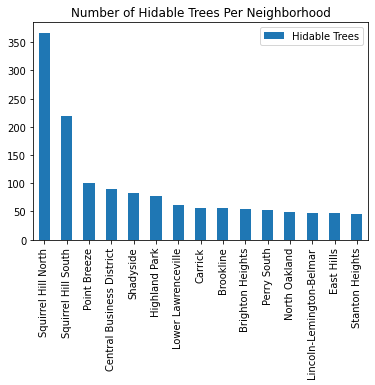

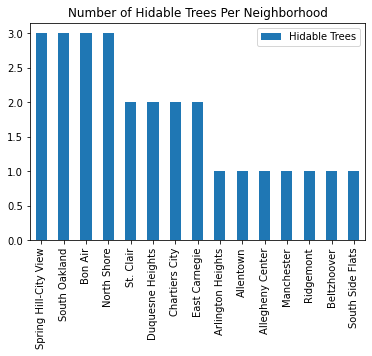

In [26]:
mostTrees = sortedTrees.head(15)
mostTrees.plot.bar(title='Number of Hidable Trees Per Neighborhood' )

leastTrees = sortedTrees.tail(15)
leastTrees.plot.bar(title='Number of Hidable Trees Per Neighborhood')

# Explanation:
This visual shows that the best neighborhood for hiding behind trees is Squirrel Hill North, with over 350 possible trees to hide behind, while South Side Flats, Beltzhoover, Ridgemont, Manchester, Allegheny Center, Allentown, and Arlington Heights fall as the worst neighborhoods in terms of hidable trees, all having just 1 tree.

# Final Analysis
We know have a few values for each neighborhood -- we have arrests/capita, population, and trees. What we can now do is combine all of those cool metrics into one number per neighborhood, and see then the best neighborhood to commit a crime overall.

## Compiling the data
First, lets get all of our data together for each neighborhood. Look how pretty it is -- each with their own little dataframe.

In [27]:
#Arrests per capita value
sortedRatio

,Arrests per capita adjusted value
Squirrel Hill North,99.977911
Swisshelm Park,99.972079
Regent Square,99.965517
North Oakland,99.963416
New Homestead,99.961616
...,...
Allegheny Center,98.802787
North Shore,97.633663
Mt. Oliver,97.489194
South Shore,86.000000


In [28]:
#Population per neighborhood
sortedPop

,Population
Chateau,11
South Shore,19
St. Clair,209
Arlington Heights,244
West End,254
...,...
North Oakland,10551
Squirrel Hill North,11363
Brookline,13214
Shadyside,13915


In [29]:
#Trees
sortedTrees

,Hidable Trees
Squirrel Hill North,367
Squirrel Hill South,220
Point Breeze,101
Central Business District,89
Shadyside,83
...,...
Allegheny Center,1
Manchester,1
Ridgemont,1
Beltzhoover,1


We are first going to do something really quick with the population dataframe -- we are quickly going to assign a "score" for each neighborhood depending on how low their population is. The lower, the less witnesses, the better! These scores will be from 1-10 (we don't want them to impact our final analysis that much). This will be a great abuse of dictionaries.


![alt-text](https://media.giphy.com/media/fIkT0LdGUc4GushZ2Q/giphy.gif)

MFW more dictionaries

In [30]:
#sortedTrees['Hidable Trees']['Point Breeze']
pop_val = {}
count = 1
for i in sortedPop.index:
    if count <= 9:
        pop_val[i] = 10
    elif count <= 18:
        pop_val[i] = 9
    elif count <= 27:
        pop_val[i] = 8
    elif count <= 36:
        pop_val[i] = 7
    elif count <= 45:
        pop_val[i] = 6
    elif count <= 54:
        pop_val[i] = 5
    elif count <= 63:
        pop_val[i] = 4
    elif count <= 72:
        pop_val[i] = 3
    elif count <= 81:
        pop_val[i] = 2
    elif count <= 90:
        pop_val[i] = 1
    count += 1
print(pop_val)

{'Chateau': 10, 'South Shore': 10, 'St. Clair': 10, 'Arlington Heights': 10, 'West End': 10, 'Esplen': 10, 'North Shore': 10, 'Hays': 10, 'Allegheny West': 10, 'Chartiers City': 9, 'Ridgemont': 9, 'Mt. Oliver': 9, 'East Carnegie': 9, 'Strip District': 9, 'Glen Hazel': 9, 'California-Kirkbride': 9, 'Bon Air': 9, 'Homewood West': 9, 'Spring Garden': 8, 'Regent Square': 8, 'Allegheny Center': 8, 'New Homestead': 8, 'Fairywood': 8, 'Oakwood': 8, 'Summer Hill': 8, 'Bedford Dwellings': 8, 'Northview Heights': 8, 'Polish Hill': 7, 'Fineview': 7, 'Swisshelm Park': 7, 'Windgap': 7, 'Middle Hill': 7, 'Larimer': 7, 'Friendship': 7, 'Arlington': 7, 'Beltzhoover': 7, 'Point Breeze North': 6, 'Upper Hill': 6, 'Manchester': 6, 'East Allegheny': 6, 'Crawford-Roberts': 6, 'Lower Lawrenceville': 6, 'Homewood South': 6, 'Elliott': 6, 'Duquesne Heights': 6, 'Allentown': 5, 'West Oakland': 5, 'Spring Hill-City View': 5, 'Upper Lawrenceville': 5, 'Troy Hill': 5, 'Central Northside': 5, 'South Oakland': 5, '

And now we will compile everything into one big dictionary (hooray for dictionaries!). Note that there are only 78 neighborhoods that have valid trees, compared to 90 that have population and ratio values. Because of this, we'll be compiling all the data for the 78 neighborhoods, since those would be the only ones that would matter for us (committing crime).

In [31]:
all_together = {}
for i in sortedTrees.index:
    all_together[i] = [pop_val[i], sortedRatio['Arrests per capita adjusted value'][i], sortedTrees['Hidable Trees'][i]]
print(all_together)

{'Squirrel Hill North': [1, 99.97791076300273, 367], 'Squirrel Hill South': [1, 99.9524156187955, 220], 'Point Breeze': [2, 99.94769520225776, 101], 'Central Business District': [4, 99.02672912648113, 89], 'Shadyside': [1, 99.93920229967661, 83], 'Highland Park': [2, 99.92197028928851, 77], 'Lower Lawrenceville': [6, 99.9017513882956, 62], 'Carrick': [1, 99.79412637199644, 57], 'Brookline': [1, 99.91017103072498, 56], 'Brighton Heights': [2, 99.86546157030496, 54], 'Perry South': [3, 99.77056694813028, 53], 'North Oakland': [1, 99.96341578997252, 49], 'Lincoln-Lemington-Belmar': [3, 99.76510342002867, 48], 'East Hills': [5, 99.67750078889239, 47], 'Stanton Heights': [3, 99.95696587698326, 46], 'Beechview': [1, 99.8660647103085, 45], 'Marshall-Shadeland': [2, 99.78073804401787, 44], 'Bloomfield': [1, 99.89635157545605, 41], 'Mount Washington': [1, 99.854756222298, 40], 'Banksville': [3, 99.93846525096525, 39], 'Garfield': [4, 99.82965986394558, 39], 'Crafton Heights': [4, 99.86628211851

And now it is actually time for our analysis (and another gross abuse of dictionaries). First, we have to decide how we'll do it.

There's a bunch of ways!
- adding up of point system
- some kind of average
- randomly selecting a neighborhood as the best (tried and tested!)

But we decided to go for something else -- we will be treating every neighborhood's list of values as a 3-dimensional coordinate. We will then calculate the volume that a rectangular prism extending from the origin to that point would have (we are going to multiply all of the values and see which neighborhood has the highest of this computed value).
- There is no particular reason we went for this way of finding the "best" other than the fact that it was something different and seemed kind of cool. Any way of compiling all of the numbers to find a best is completely valid (like addition or averages or whatever), but just remember that this metric is most definitely awesome and interesting.



In [32]:
#More dictionaries (I love dictionaries)
final = {}
for i in all_together:
    final[i] = all_together[i][0]*all_together[i][1]*all_together[i][2]
print(final)

{'Squirrel Hill North': 36691.893250022, 'Squirrel Hill South': 21989.53143613501, 'Point Breeze': 20189.43443085607, 'Central Business District': 35253.51556902728, 'Shadyside': 8294.953790873158, 'Highland Park': 15387.98342455043, 'Lower Lawrenceville': 37163.451516445966, 'Carrick': 5688.265203203797, 'Brookline': 5594.969577720599, 'Brighton Heights': 10785.469849592935, 'Perry South': 15863.520144752714, 'North Oakland': 4898.207373708653, 'Lincoln-Lemington-Belmar': 14366.174892484129, 'East Hills': 23424.212685389713, 'Stanton Heights': 13794.06129102369, 'Beechview': 4493.972911963883, 'Marshall-Shadeland': 8780.704947873572, 'Bloomfield': 4095.750414593698, 'Mount Washington': 3994.1902488919195, 'Banksville': 11692.800434362935, 'Garfield': 15573.42693877551, 'Crafton Heights': 15579.140010487678, 'Knoxville': 13956.13557512677, 'Friendship': 23780.0, 'East Liberty': 5983.305503492929, 'Sheraden': 7783.410832232496, 'Westwood': 12491.805283757338, 'Regent Square': 16794.2068

In [33]:
#Turning it into a df
finalData = pd.DataFrame([final])
finalDF = finalData.transpose()
finalDF = finalDF.rename(columns={0: 'Final Crime-ability Score'})

sortedFinal = finalDF.sort_values('Final Crime-ability Score', ascending=False)
sortedFinal

,Final Crime-ability Score
Lower Lawrenceville,37163.451516
Squirrel Hill North,36691.893250
Central Business District,35253.515569
Friendship,23780.000000
East Hills,23424.212685
...,...
Allegheny Center,790.422294
Beltzhoover,698.338182
Manchester,598.769014
Allentown,498.302000


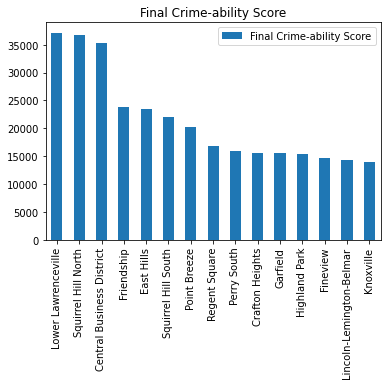

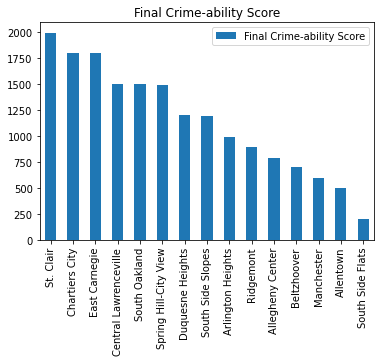

In [34]:
mostFinal = sortedFinal.head(15)
mostFinal.plot.bar(title='Final Crime-ability Score' )

leastFinal = sortedFinal.tail(15)
leastFinal.plot.bar(title='Final Crime-ability Score')

# The Best Neighborhood:

With a final crime-ability score of 36691.893250022, **Lower Lawrenceville** takes the cake for being the best place to commit crimes! You can see this through Lower Lawrenceville's three scores: 6, 99.9017513882956, 62. Because of the nature of our final analysis (treating each neighborhood as a 3-D shape), Lower Lawrenceville's main benefit was having a great spread across the three categories. That was Squirrel Hill North's downfall -- while having two amazing scores in 367 trees and a crime/capita value of 99.9779, it looked to be a winner! It's high population, giving it a population score of 1, ended up bringing it just barely behind Lower Lawrenceville's final score.

Whether or not it is *actually* easier to commit crimes in Lower Lawrenceville is up to debate, but according to these arbitrary and fun metrics, it sure looks like it is!

### 3-D Visualization
Since we are treating these neighborhoods like shapes, we can actually model them in 3-D. We didn't cover this in class, we to accomplish this, we followed a tutorial from geeksforgeeks. Try it out for yourself: https://www.geeksforgeeks.org/how-to-draw-3d-cube-using-matplotlib-in-python/

C:\Users\cesar\AppData\Local\Temp\ipykernel_28324\2050570013.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(dimensions, dtype=np.bool)


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f6e36730>,
 (0, 0, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f754bee0>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f75664c0>,
 (0, 1, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f75668b0>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7566ca0>,
 (0, 2, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a3f0d0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a3f4c0>,
 (0, 3, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a3f8b0>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a3fca0>,
 (0, 4, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a4a0d0>,
 (0, 5, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a4a4c0>,
 (0, 5, 61): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a4a8b0>,
 (0, 6, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1a6f7a4aca0>,
 (0, 6

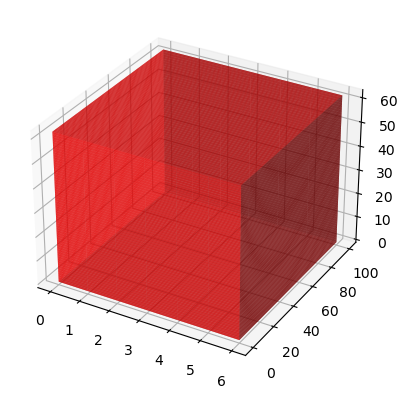

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Dimensions of our shape -- in the tutorial this is listed as created axes,
#but these numbers are the dimensions of our shape. We'll use Lower Lawrenceville's
#scores from our analysis. We round up to 100.
dimensions = [6, 100, 62]

#Makes it usable data for the shape creation
data = np.ones(dimensions, dtype=np.bool)

#Transparency of the cube. I like them a little more transparent, but it's up to
#the user.
alpha = 0.6

#Makes it so that voxels are being set to a color (red)
colors = np.empty(dimensions + [4], dtype=np.float32)
colors[:] = [1, 0, 0, alpha]  # red

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#voxels are 3d pixels -- our 3d shape is constructed of these
ax.voxels(data, facecolors=colors)

Ta-da! If Lower Lawrenceville's crime-ability was a shape, it'd be this one.

# Reflections
Cesar: Although I haven't been to many Pittsburgh neighborhoods, I have taken a trip to Lower Lawrenceville. Although I don't remember much from that trip aside from really enjoying it, it definitely could be a place to commit crime in. Maybe there were actually a bunch of criminals that I never saw. In reality though, I think the neighborhood with the most crime is Oakland -- Pitt commits the grave crime of raising tuition by so much each year. I think my favorite neighborhood is Oakland, because I love going to school here.

Caden: I don't know anything about any of the Pittsburgh neighborhoods, but from this activity we found that Lower Lawrenceville would be a great place to commit crimes in. My favorite is Oakland because my university is here.

Ryan: I am from a suburb of Pittsburgh, and although I don't go to Lower Lawrencville often, the times I have gone have definately shown me committing crimes there would be pretty easy. My personal favorite neighborhood is Squirrel Hill North, which came in second place.